In [4]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [5]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [6]:
origin = load_data("wage")
origin.head()

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [7]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [8]:
origin.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [9]:
df1 = origin.astype({'year':'category', 'maritl':'category',
                     'race':'category', 'education':'category', 'region':'category',
                     'jobclass':'category', 'health':'category', 'health_ins':'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB


수치형 변수에 대한 데이터 분포 확인 (기술통계)
- 전처리 과정에서 명목형으로 변경된 변수는 요약통계량에서 자동으로 제외된다.

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,42.414667,11.542406,18.000000,33.750000,42.000000,51.000000,80.000000
logwage,3000.0,4.653905,0.351753,3.000000,4.447158,4.653213,4.857332,5.763128
wage,3000.0,111.703608,41.728595,20.085537,85.383940,104.921507,128.680488,318.342430


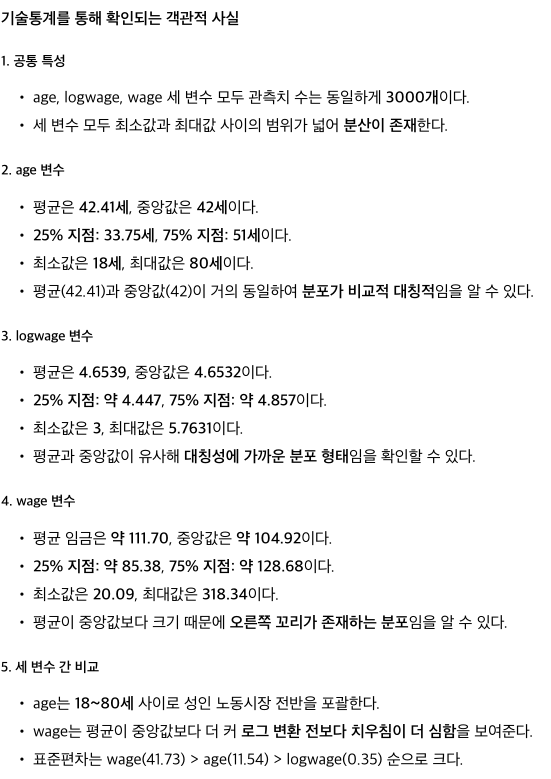

2. 상자그림
- boxplot 함수의 data 파라미터에 데이터 프레임을 통째로 지정할 경우 자동으로 명목형 변수는 제외하고 시각화 한다.

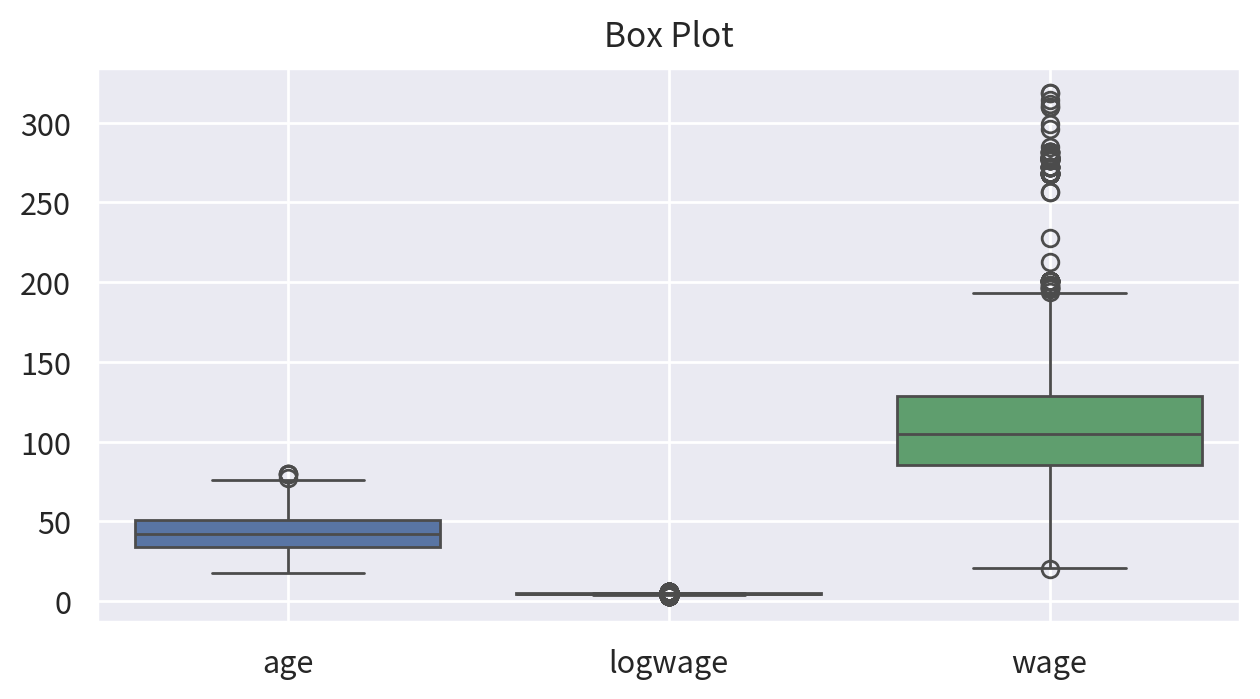

In [11]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df1)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)
ax.set_title("Box Plot",fontsize=12, pad=8)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

데이터 구간 차이가 심할 경우 하나의 그래프에 모든 컬럼을 시각화 하는 것은 해석하기 어려운 결과물이 생성됨
- 그래서 각각 그리는 것이 좋음

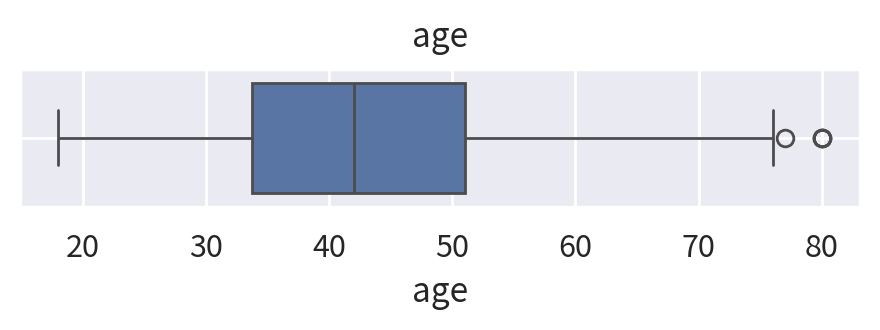

In [12]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 900            #그래프 가로 크기
height_px = 350             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df1, x='age')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)
ax.set_title("age",fontsize=12, pad=8)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

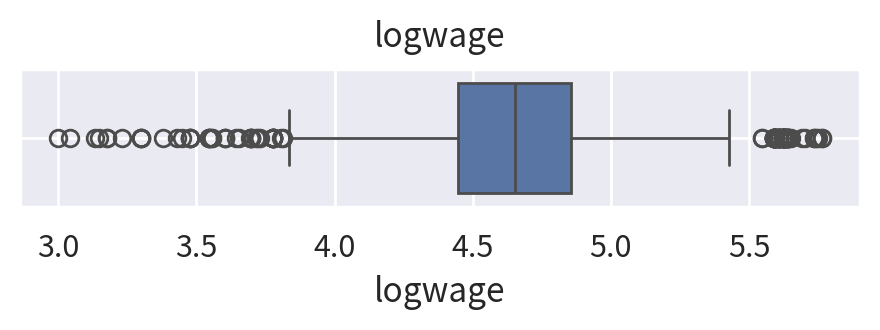

In [13]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 900            #그래프 가로 크기
height_px = 350             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df1, x='logwage')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)
ax.set_title("logwage",fontsize=12, pad=8)
# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

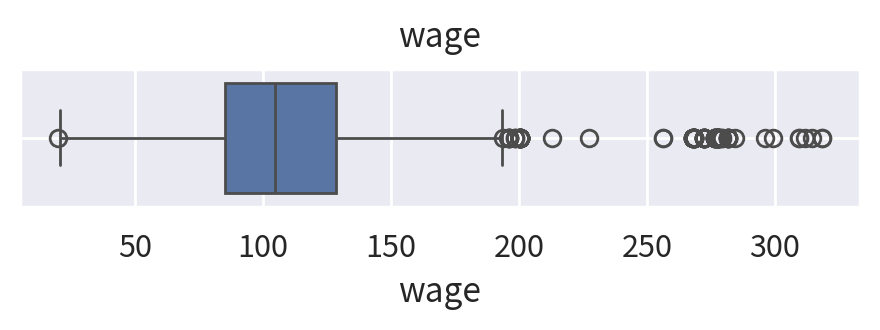

In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 900            #그래프 가로 크기
height_px = 350             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df1, x='wage')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)
ax.set_title("wage",fontsize=12, pad=8)
# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

알 수 있는 사실 [요약]
- 조사 인원은 3000명이다.
- 조사 인원의 연령은 18세 ~ 80세까지 이고, 평균 연령은 42.4세이다.
- 조사 인원의 임금은 20~318이고, 평균 임금은 111.7, 로그 변환 값은 4.65이다.
- 연령에 대한 표준편차는 11.5이고, 임금의 표준 편차는 41.73이다.
- 임금에 대한 표준편차가 크다.

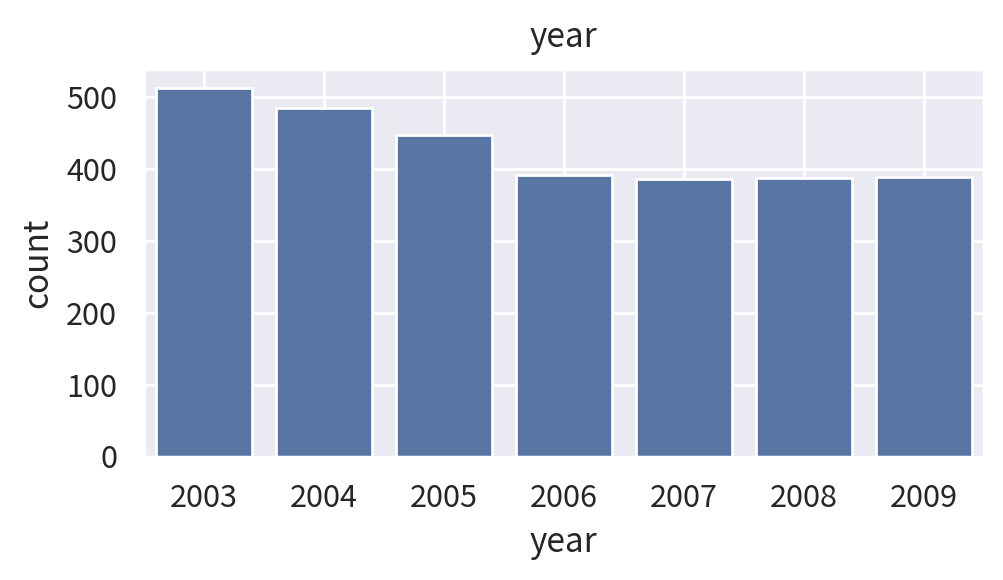

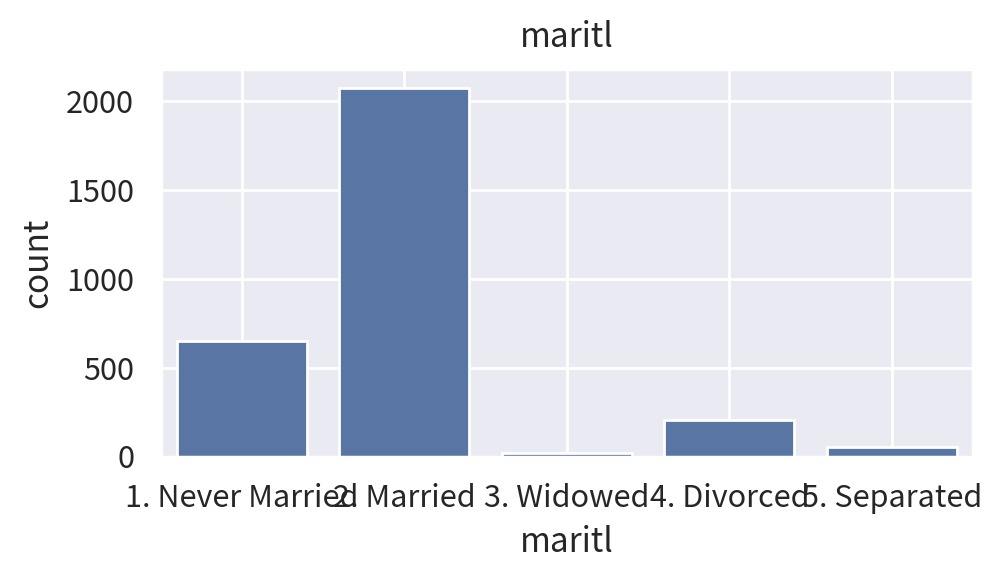

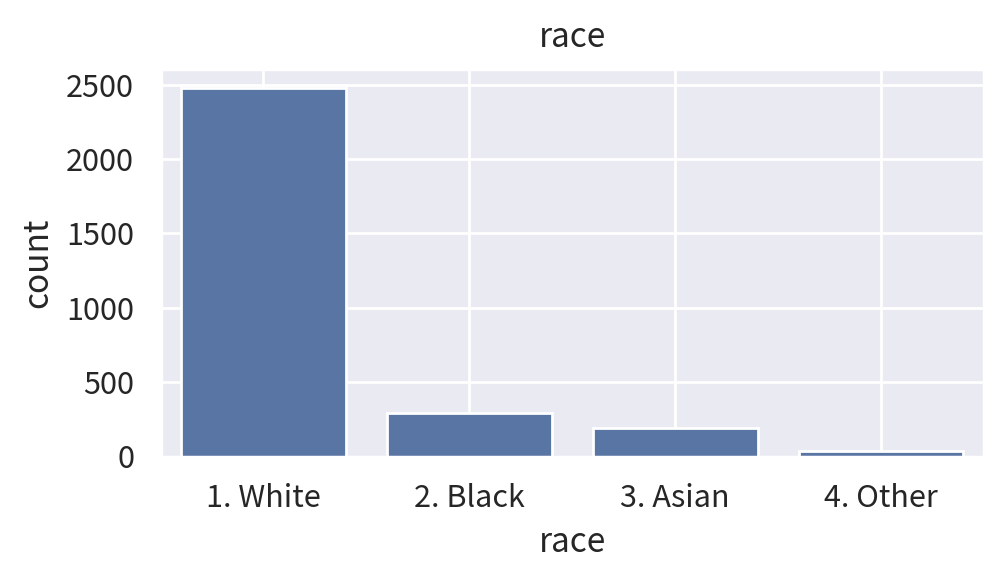

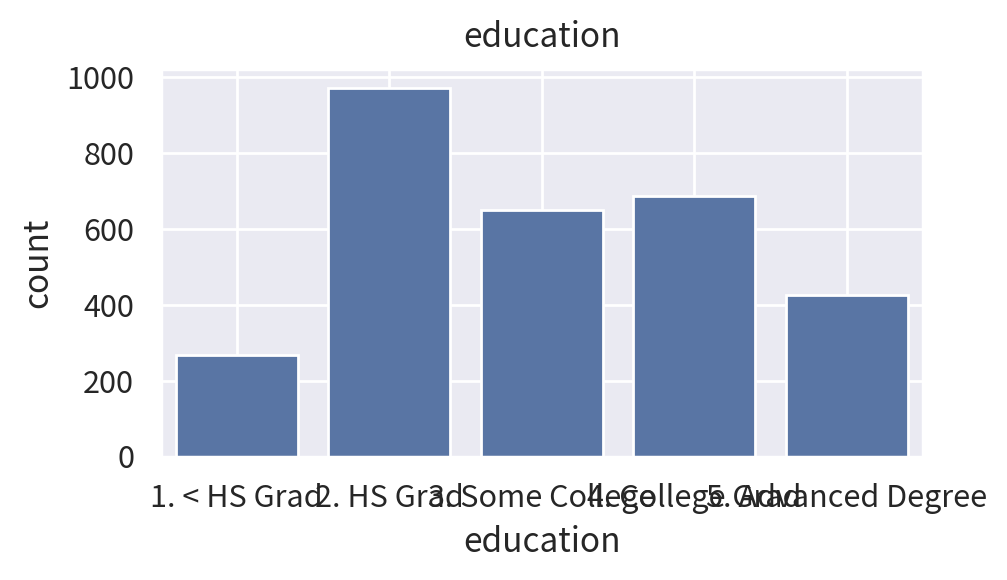

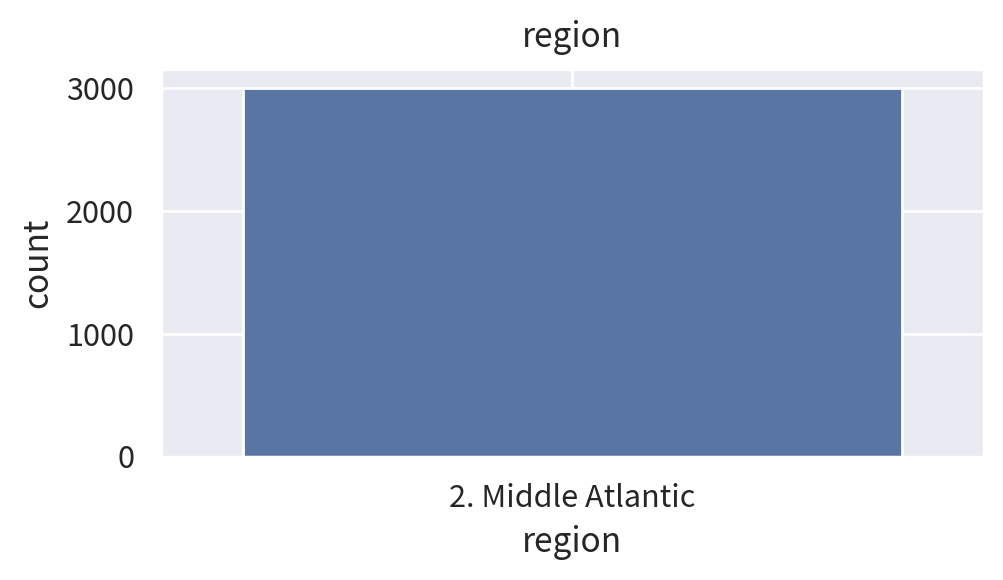

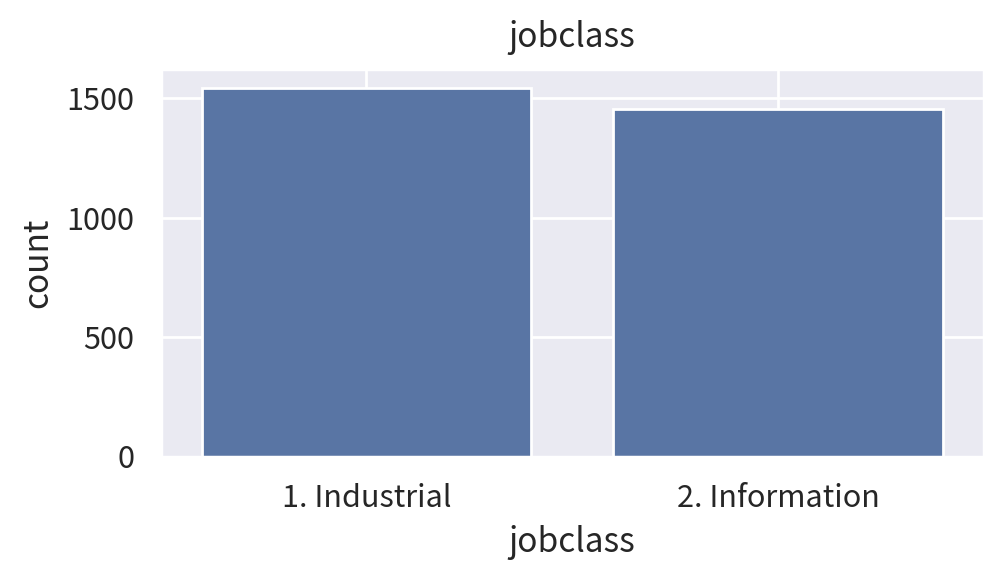

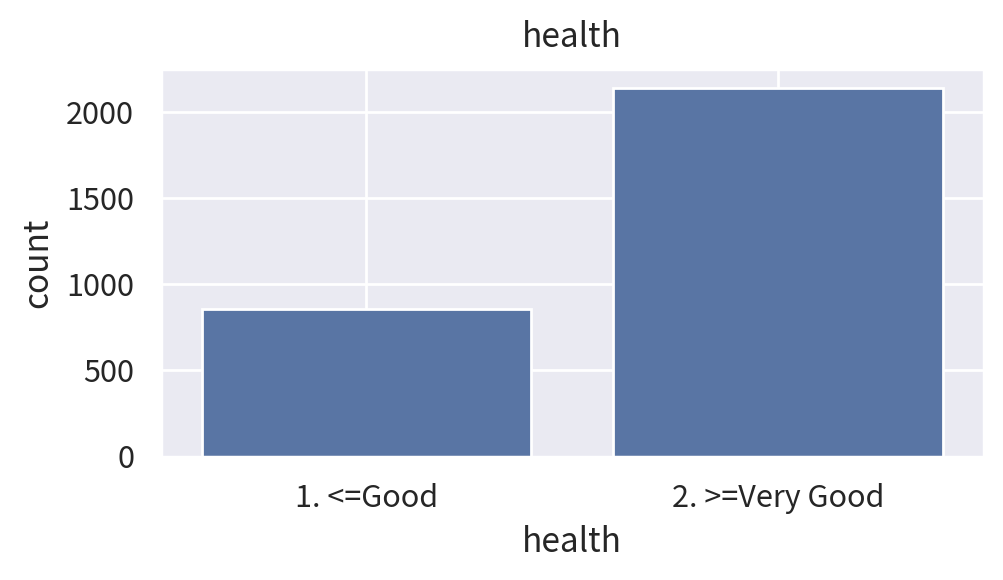

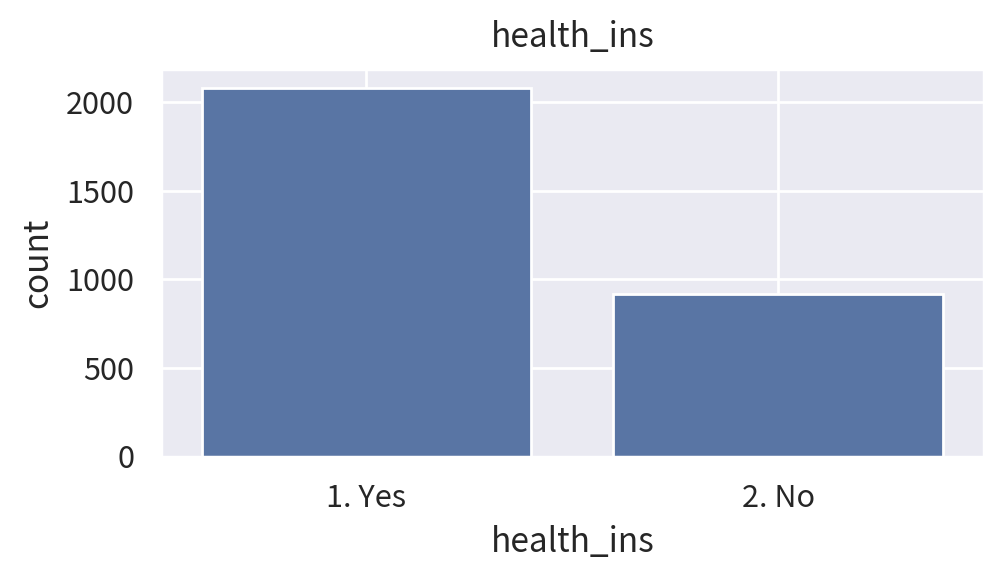

In [15]:
fields = ['year', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']

for f in fields:
    # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
    width_px = 1024             #그래프 가로 크기
    height_px = 600             #그래프 세로 크기
    rows = 1                    #도화지의 행 수
    cols = 1                    #도화지의 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
    
    # 2) 그래프 그리기 -> seaborn 사용
    sb.countplot(data=df1, x=f)
    
    # 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
    ax.grid(True)
    ax.set_title(f, fontsize=12, pad=8)
    
    # 4) 출력
    plt.tight_layout()                      #여백 제거
    # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
    plt.show()                              #그래프 화면 출력
    plt.close()                             #그래프 작업 종료

알 수 있는 사실
1. 기혼자가 그렇지 않은 사람보다 많다.
2. 백인이 다른 인종보다 더 많다.
3. 고등학교 졸업(HS Grad)가 가장 많고 그 다음으로 많은 경우는 대학교 졸업, 대학교 중퇴, 대학원 졸업 순이다. 일부 고등학교 미만의 학력도 보인다.
4. 조사 지역은 중앙 대서양 연안으로만 한정되어 있다.
5. 직군은 생산직과 사무직이 비슷한 비율로 분포되어 있지만 생산직이 약간 더 많은 비율을 차지한다.
6. 건강 상태는 대부분의 조사 대상이 좋은 상태를 보이고 있다.
7. 건강 보험은 대부분의 조사 대상이 가입되어 있다.

In [16]:
# 결혼 여부에 따른 임금 수준 비교
# - 결혼 여부에 따라 임금 수준을 히스토그램으로 비교하기

married = sorted(list(df1['maritl'].unique()))
married

['1. Never Married', '2. Married', '3. Widowed', '4. Divorced', '5. Separated']

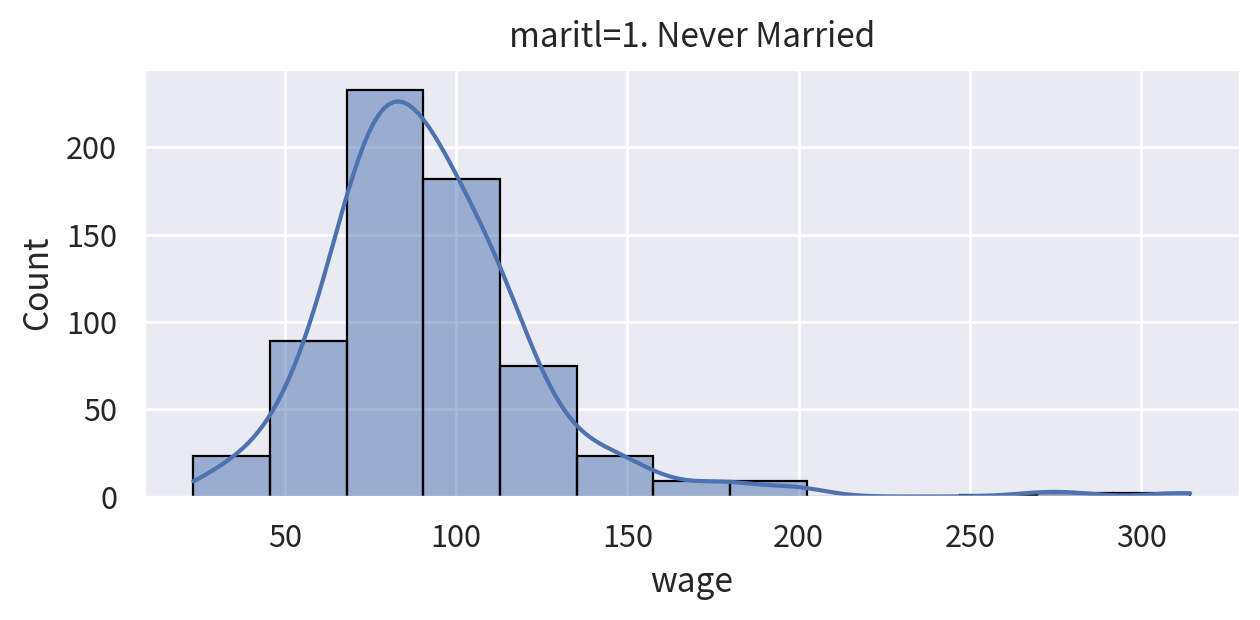

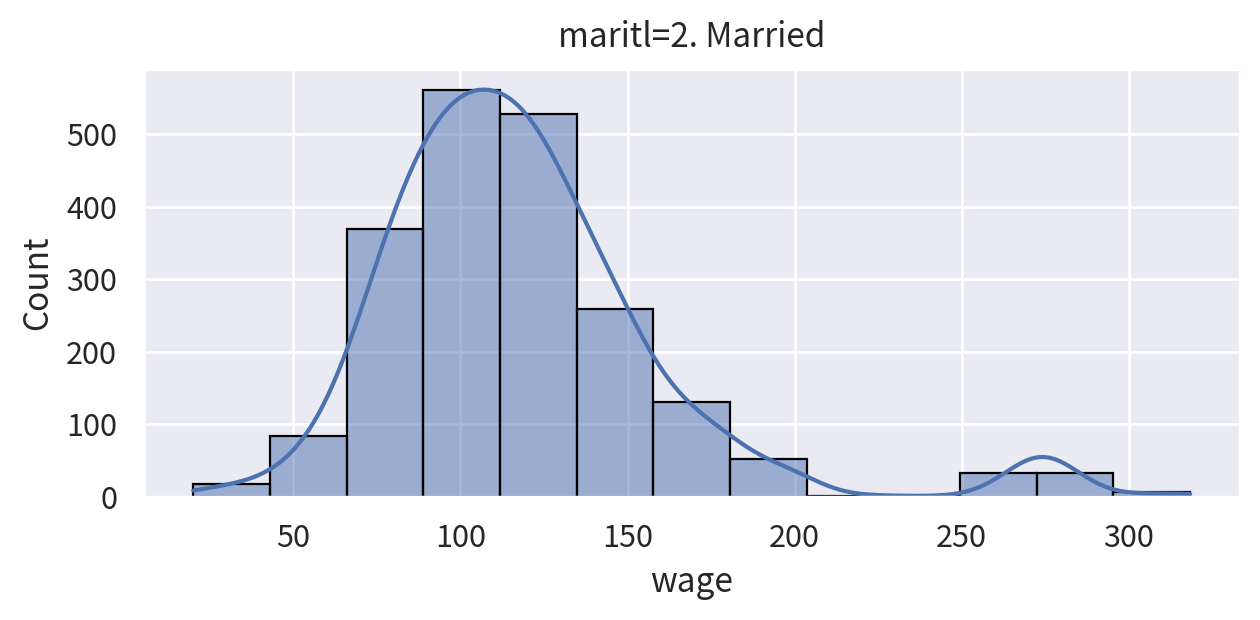

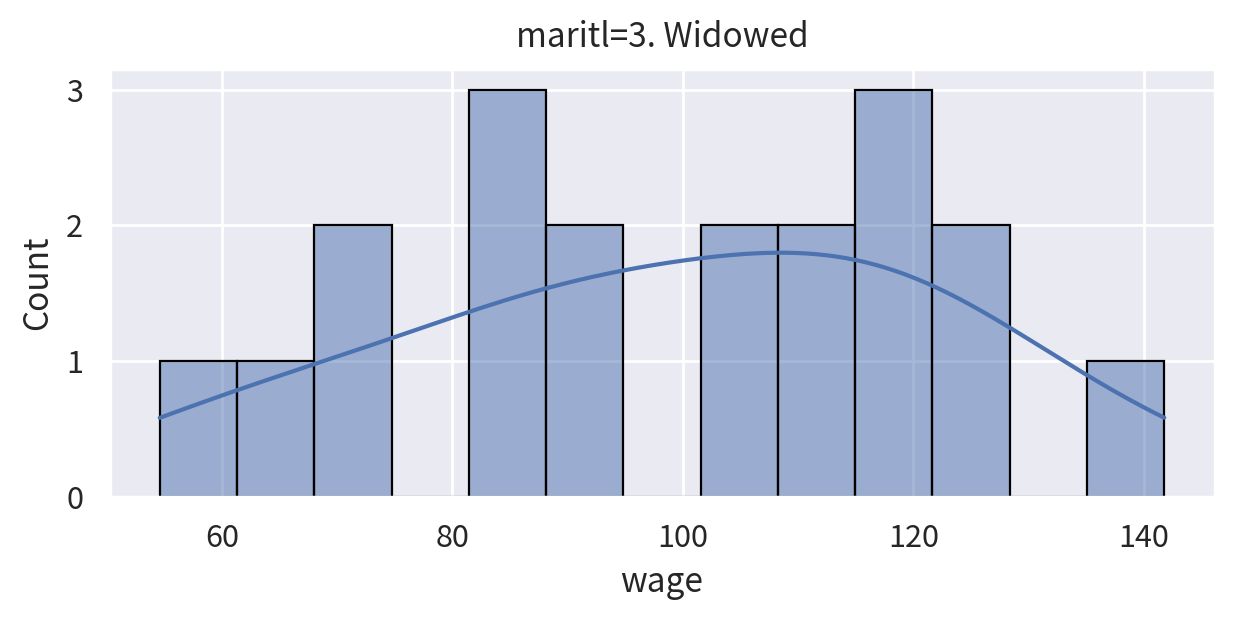

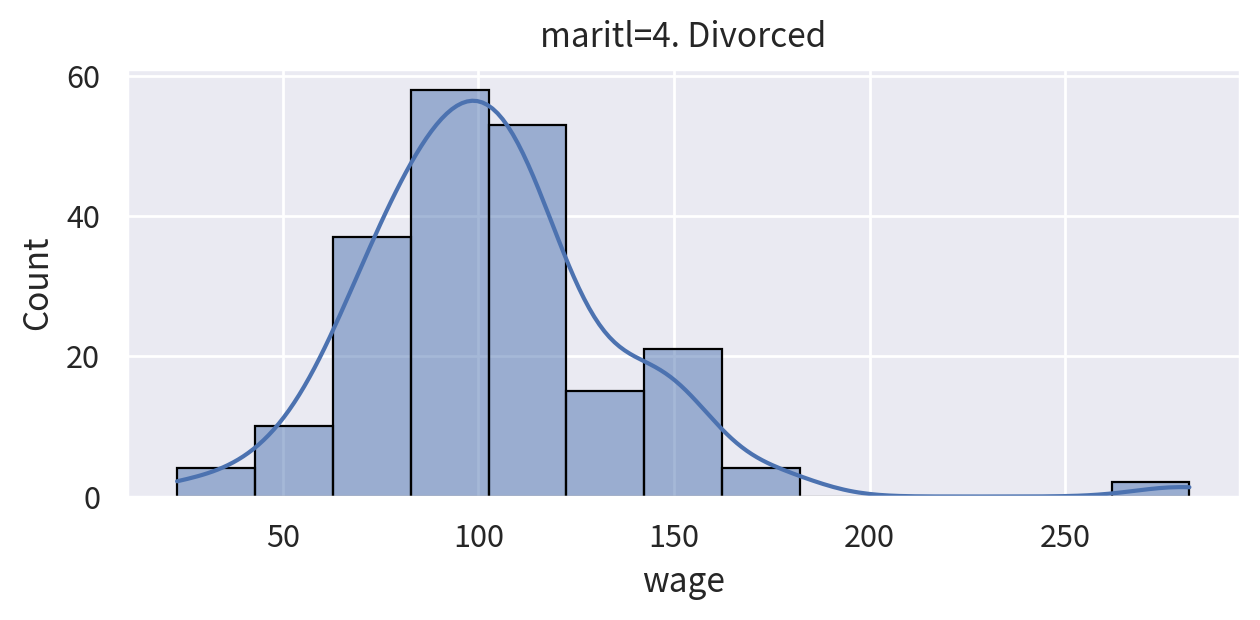

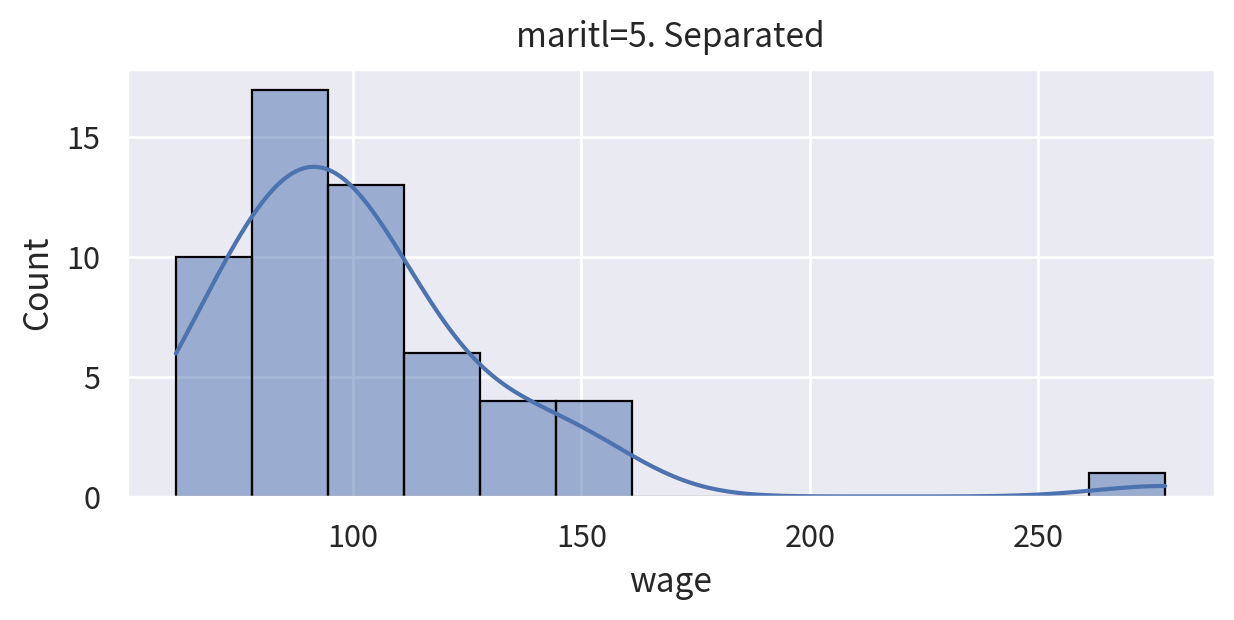

In [17]:
bins_count = 13
for m in married:
    mdf = df1.query("maritl ==@m")

    # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
    width_px = 1280             #그래프 가로 크기
    height_px = 640             #그래프 세로 크기
    rows = 1                    #도화지의 행 수
    cols = 1                    #도화지의 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
    
    # 2) 그래프 그리기 -> seaborn 사용
    sb.histplot(data=mdf, x="wage",bins=bins_count, edgecolor='black', linewidth=0.8, kde=True)
    
    # 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
    ax.grid(True)
    ax.set_title("maritl=%s"%m, fontsize=12, pad=8)

    # 4) 출력
    plt.tight_layout()                      #여백 제거
    # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
    plt.show()                              #그래프 화면 출력
    plt.close()                             #그래프 작업 종료

알 수 있는 사실
1. 미혼인 경우보다는 기혼인 경우의 소득 수준이 더 높으며 미혼인 고액 소득자보다 기혼인 고액 소득자가 더 많다.
2. 미망인의 경우도 미혼인 경우보다는 소득 수준이 높은 것으로 나타났다.
3. 이혼 혹은 별거의 경우 미혼인 경우보다도 소득수준이 낮은 것으로 나타났다.

In [18]:
# 교육 수준에 따른 임금 수준 비교
education = sorted(list(df1['education'].unique()))
education 

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

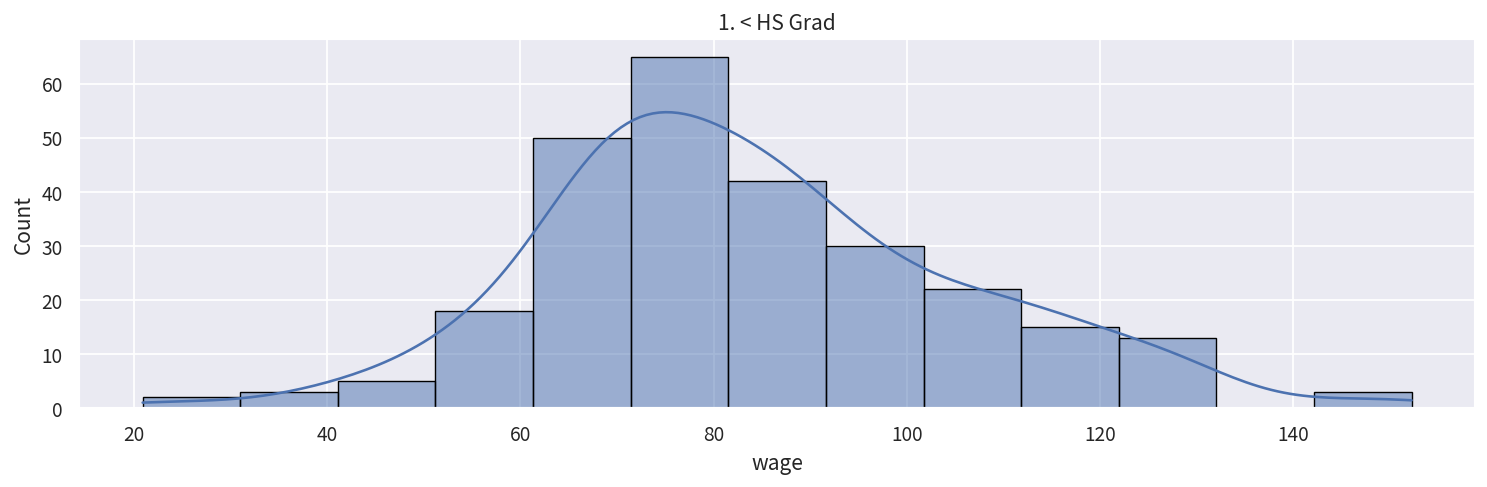

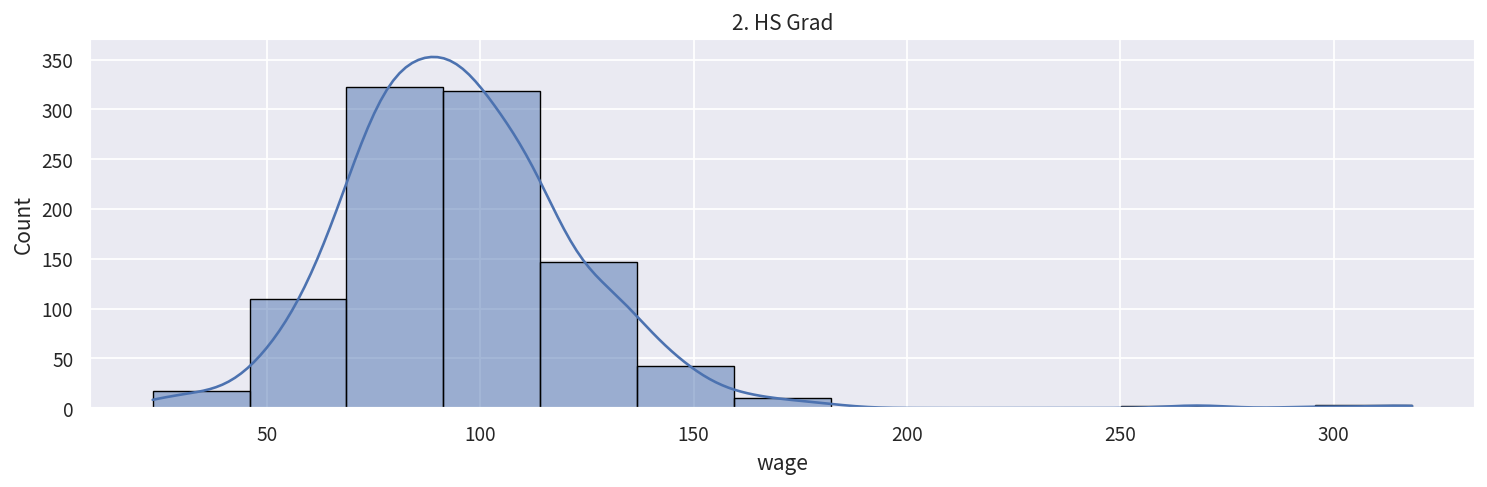

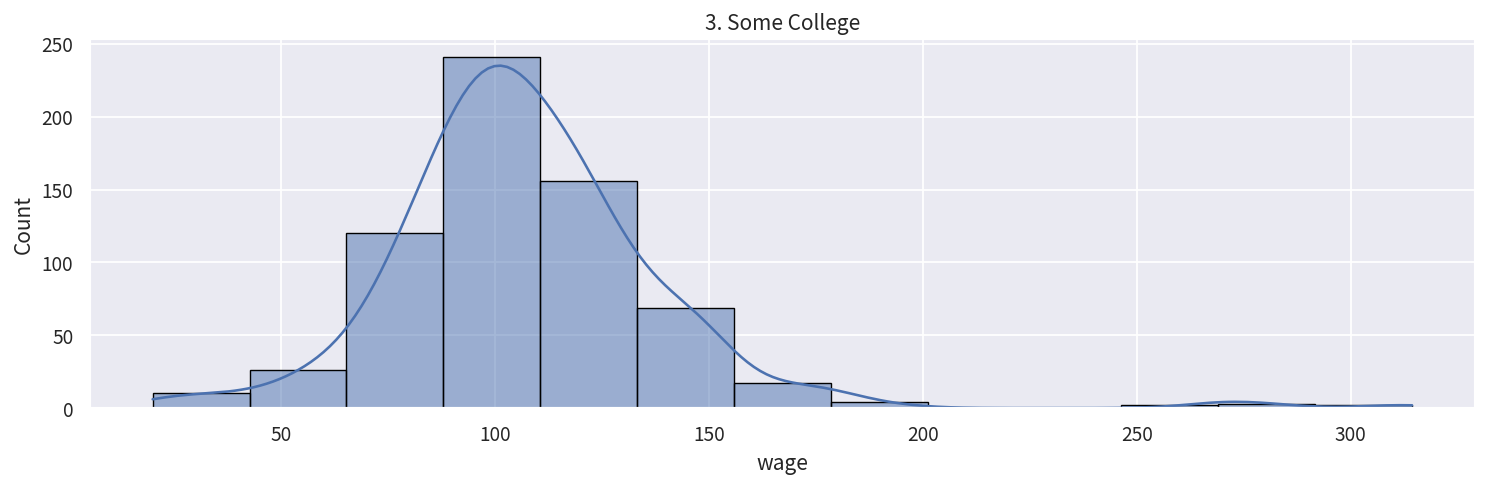

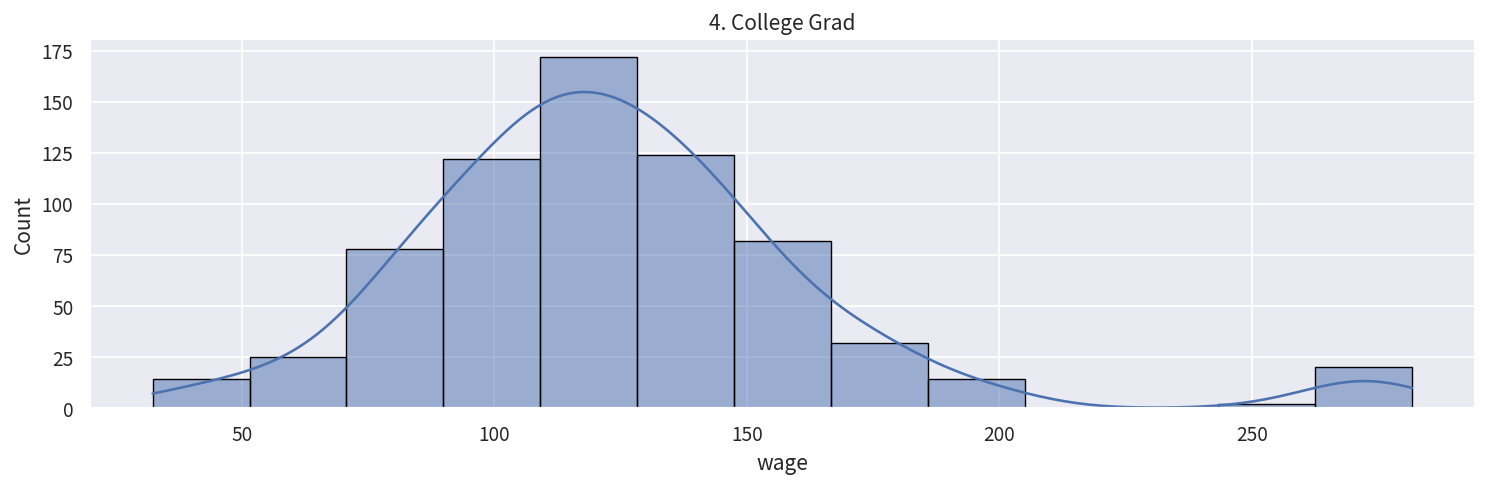

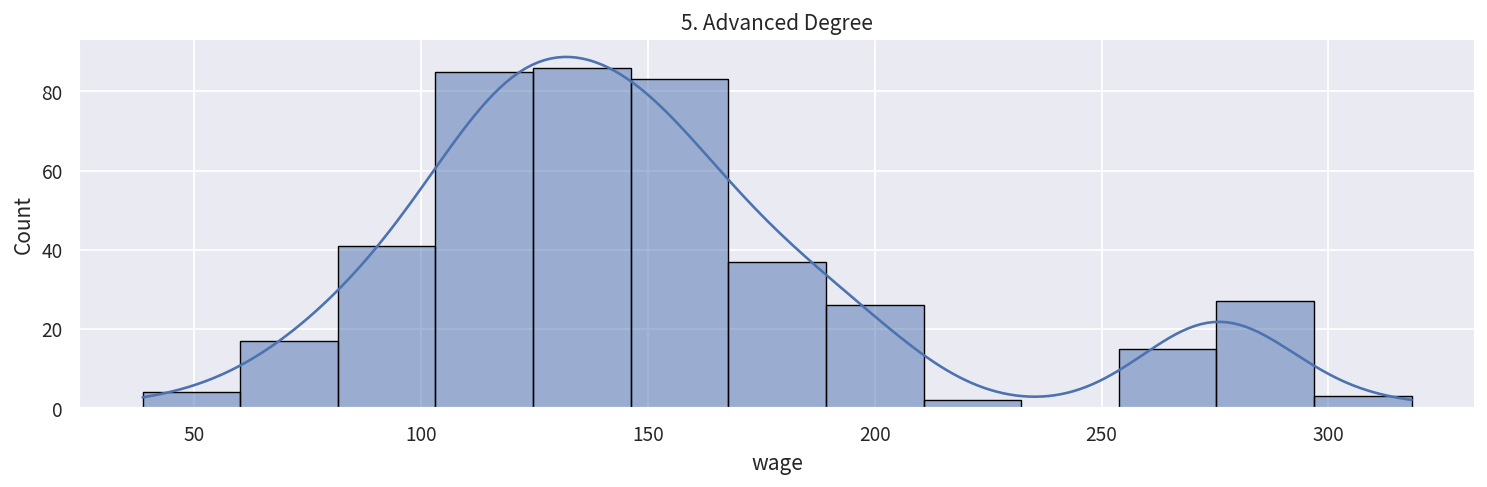

In [19]:
bins_count=13
for e in education:
    mdf = df1.query("education ==@e")

    plt.figure(figsize=(12,4), dpi=125)

    # 2) 그래프 그리기 -> seaborn 사용
    sb.histplot(data=mdf, x="wage",bins=bins_count, edgecolor='black', linewidth=0.8, kde=True)
    
    # 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
    plt.title(e)
    plt.grid()
    
    # 4) 출력
    plt.tight_layout()                      #여백 제거
    # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
    plt.show()                              #그래프 화면 출력
    plt.close()                             #그래프 작업 종료

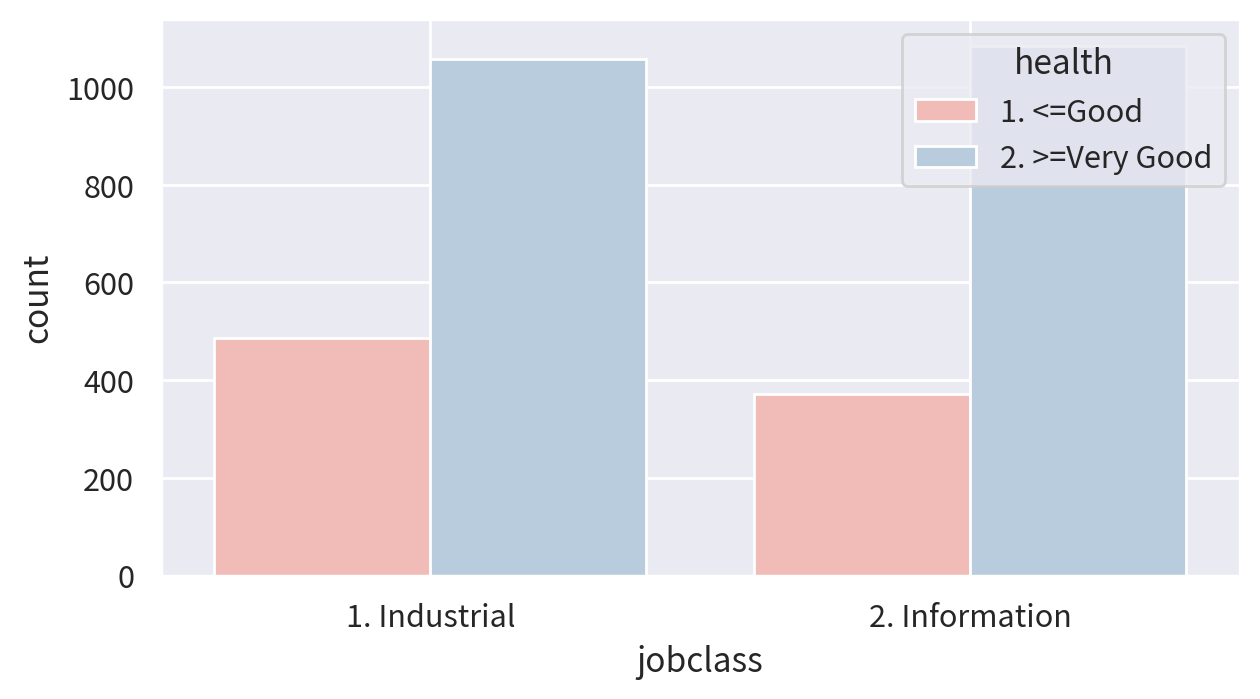

In [20]:
# 직군별 건강상태 확인
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.countplot(data=df1, x="jobclass", hue="health", palette="Pastel1")

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

대부분 건강 상태가 좋지만 평균 이하의 건강상태는 생산직군에 더 많음

# 연습문제

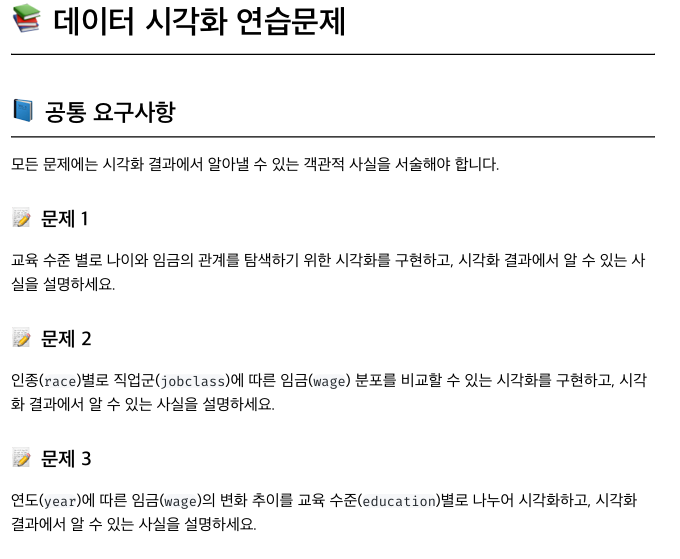

In [21]:
# 교육 수준 별 나이와 임금의 관계를 탐색
education = sorted(list(df1['education'].unique()))
education 

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

C:\Users\itwill\AppData\Local\Temp\ipykernel_18320\3603427411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf["age_group"] = (mdf["age"] // 10) * 10


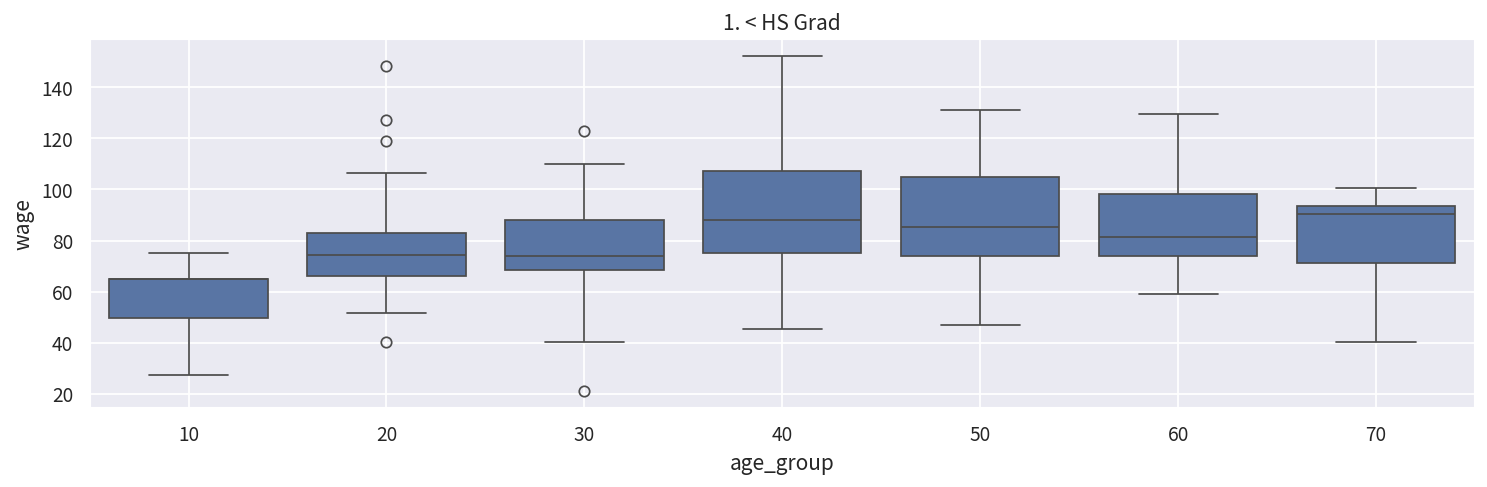

C:\Users\itwill\AppData\Local\Temp\ipykernel_18320\3603427411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf["age_group"] = (mdf["age"] // 10) * 10


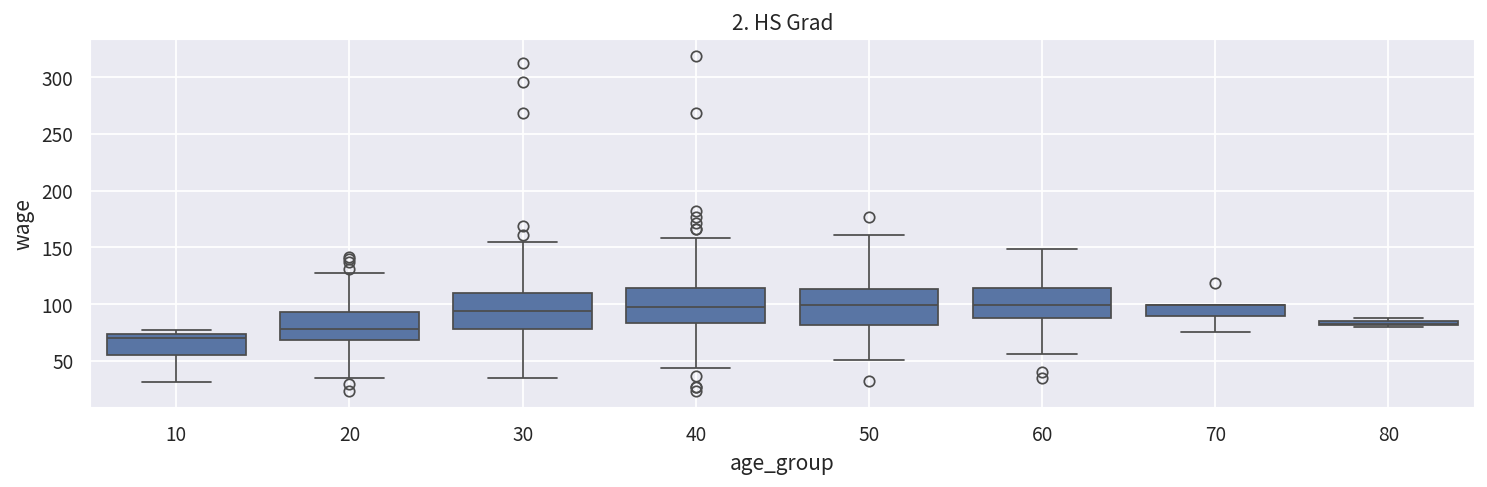

C:\Users\itwill\AppData\Local\Temp\ipykernel_18320\3603427411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf["age_group"] = (mdf["age"] // 10) * 10


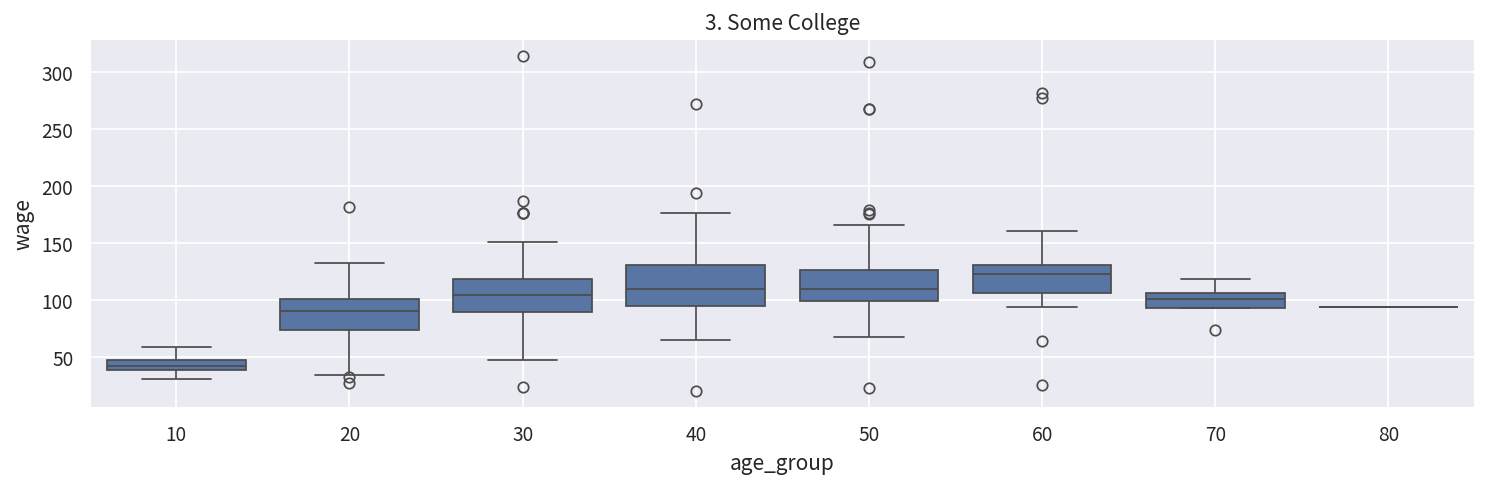

C:\Users\itwill\AppData\Local\Temp\ipykernel_18320\3603427411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf["age_group"] = (mdf["age"] // 10) * 10


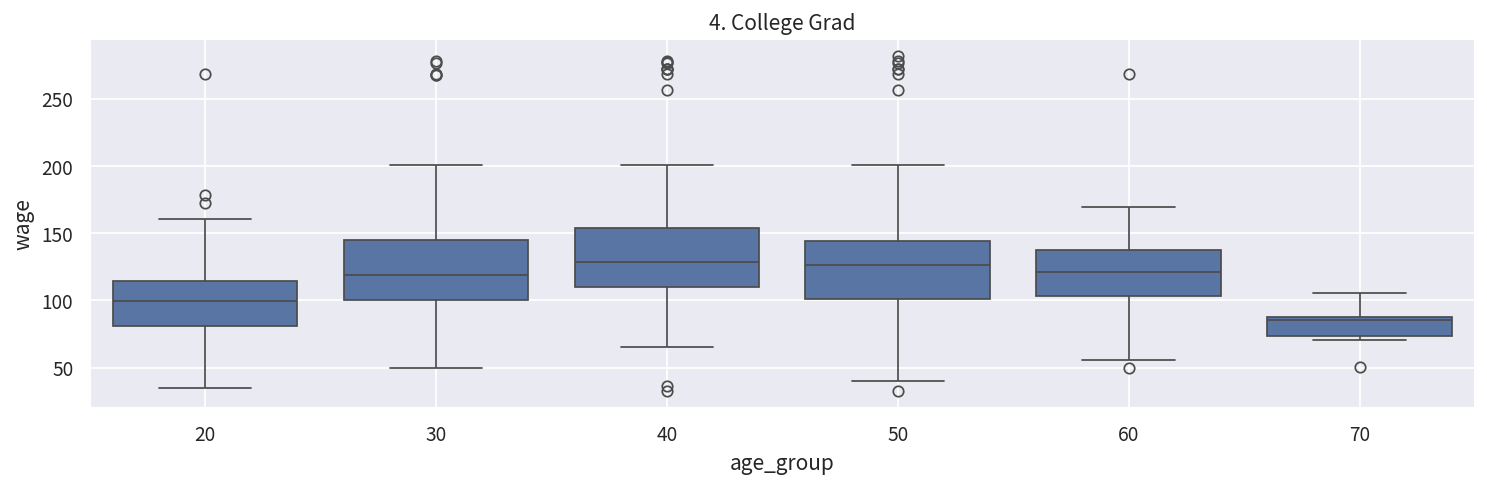

C:\Users\itwill\AppData\Local\Temp\ipykernel_18320\3603427411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf["age_group"] = (mdf["age"] // 10) * 10


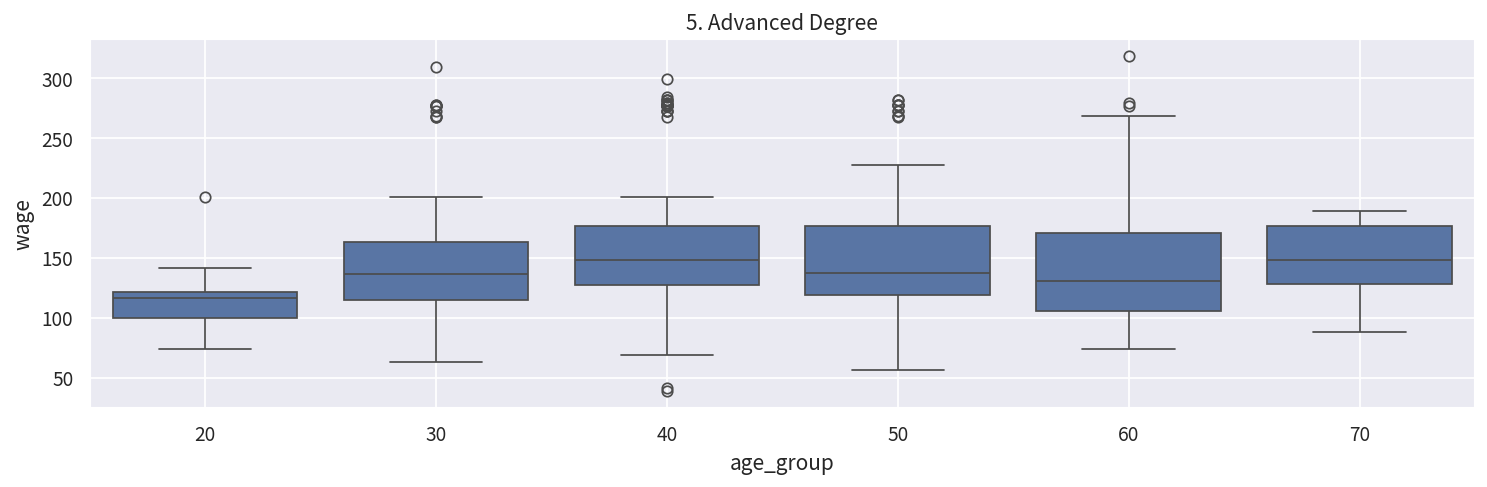

In [22]:
# 교육 수준 별 나이와 임금의 관계를 탐색 시각화
bins_count=13
for e in education:
    mdf = df1.query("education ==@e")
    plt.figure(figsize=(12,4), dpi=125)
    # 나이를 10대 단위로 
    mdf["age_group"] = (mdf["age"] // 10) * 10
    sb.boxplot(data=mdf, x="age_group", y="wage")

    plt.title(e)
    plt.grid()

    plt.tight_layout()                      #여백 제거
    # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
    plt.show()                              #그래프 화면 출력
    plt.close()                             #그래프 작업 종료

1. 고졸 미만과 고졸
	1. 고졸 미만보다 고졸의 3,40대 임금 극단치가 2배 가량 차이난다.
	2. 고졸 미만과 고졸의 나이에 따른 임금 증가 추세는 비슷한 것으로 나타난다.
2. 대학 중퇴와 대학 졸업
	1. 20대부터 60대까지 전반적으로 대졸의 최대치가 대학 중퇴보다 높은 것으로 나타난다.
	2. 대졸의 경우 임금의 이상치가 상당수로 존재한다.
	3. 중앙값이 대학 중퇴보다 대학 졸업이 50대까진 더 높다가 60대부터 대학 중퇴와 비슷하거나 떨어져있는 것으로 나타난다.
3. 대학 졸업과 대학원 졸업
	1. 중앙값의 경우 전반적으로 대학원 졸업이 높은 것으로 나타남
	2. 대학 졸업의 경우 50대부터 사분위 수가 줄어드는 것으로 보이지만 대학원 졸업의 경우 50대 이후로 사분위 수가 두터워지는 것을 확인할 수 있다.
	3. 대학 졸업의 경우 40대까지 늘어났다가 줄어드는 추세지만, 대학원 졸업의 경우 전반적으로 비슷한 임금을 받는것으로 확인된다.

In [23]:
origin = load_data("wage")
origin.head()

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [24]:
# 인종별로 직업군에 따른 임금 분포 비교를 위한 인종 데이터 추출
race = sorted(list(df1['race'].unique()))
race

['1. White', '2. Black', '3. Asian', '4. Other']

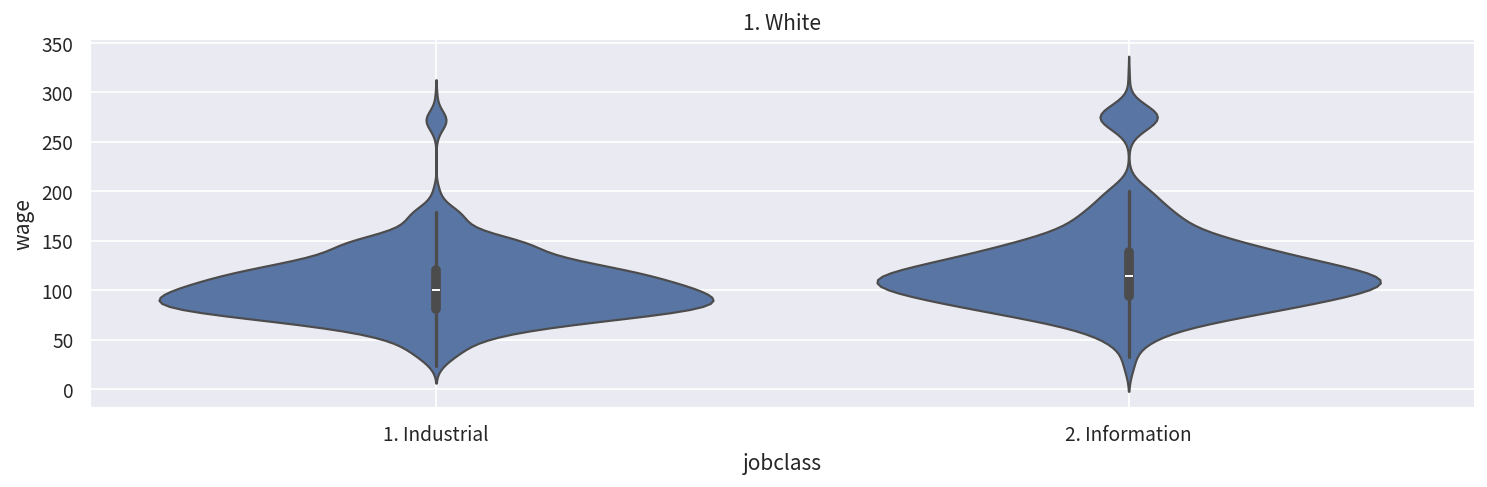

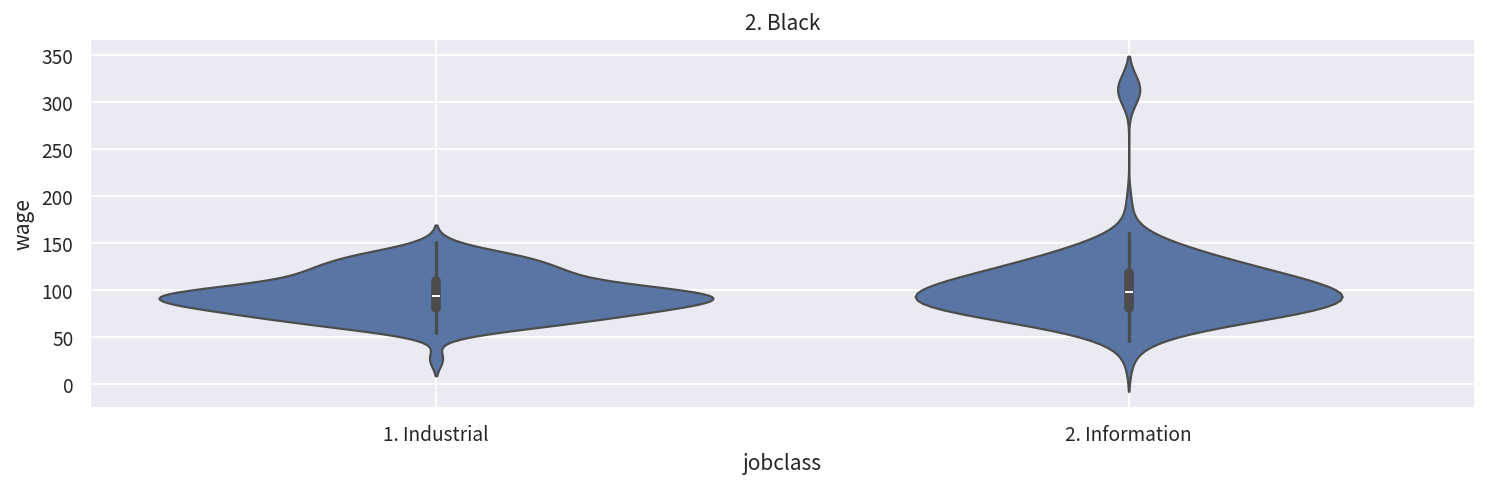

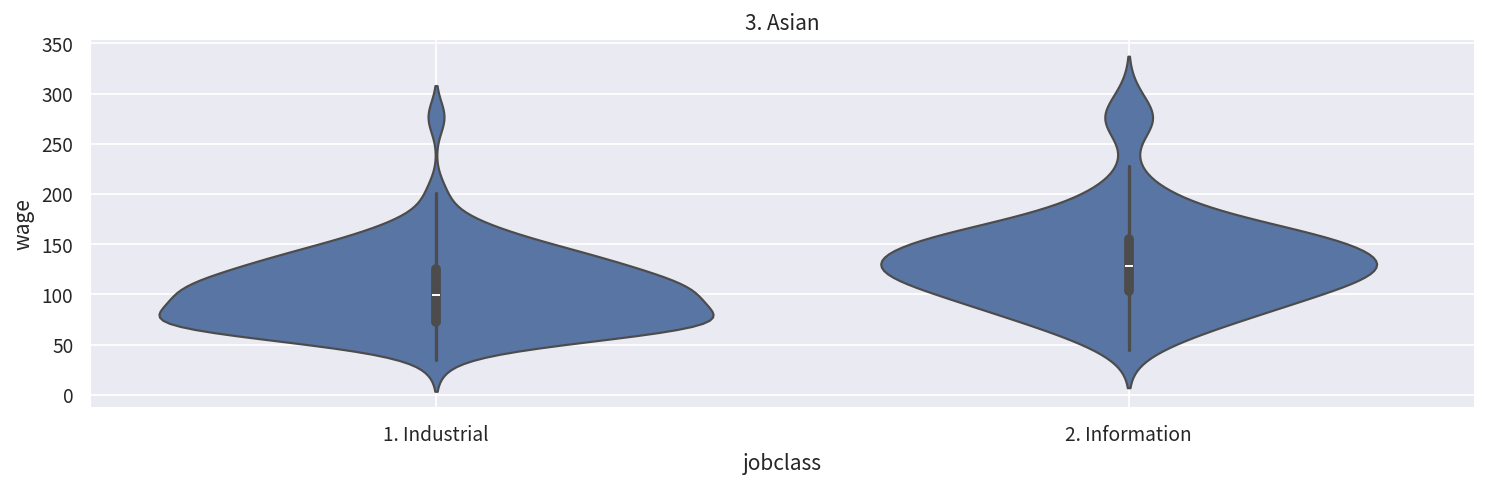

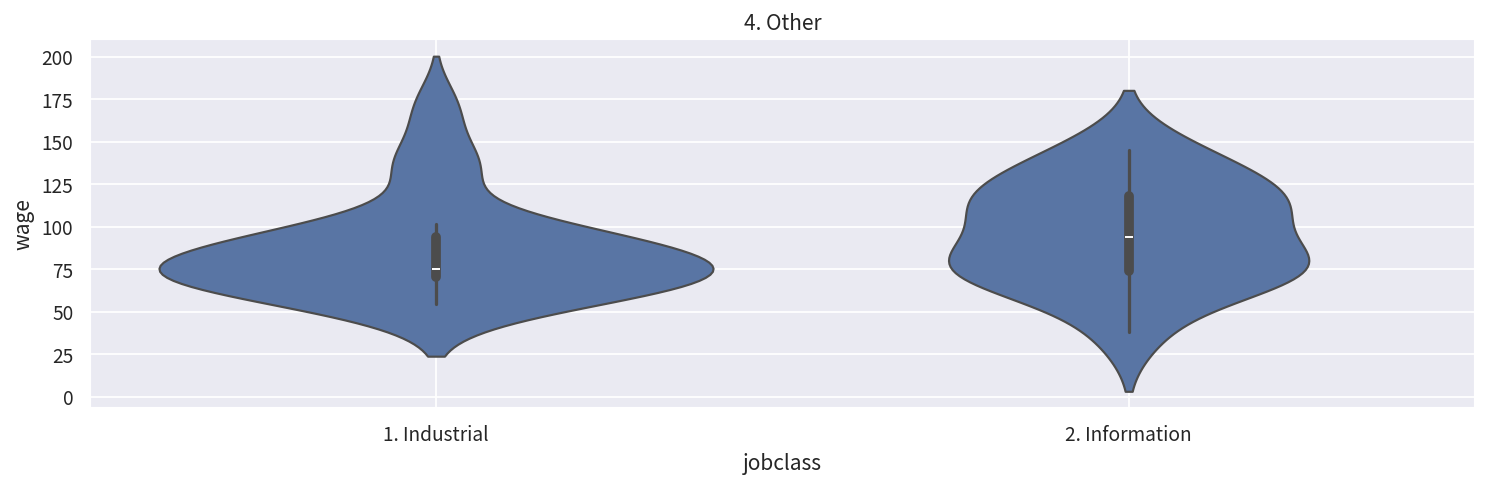

In [25]:
for r in race:
    mdf = df1.query("race ==@r")
    plt.figure(figsize=(12,4), dpi=125)
    sb.violinplot(data=mdf, x="jobclass", y="wage")
    plt.title(r)
    plt.grid()
    plt.tight_layout()                      #여백 제거
    # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
    plt.show()                              #그래프 화면 출력
    plt.close()                             #그래프 작업 종료

1. 백인의 경우 산업군에서 50~150 임금 사이에 몰려 있는것을 확인할 수 있고 250~300 사이에 봉우리가 나타나는 것을 보아 고임금자가 소수 있음을 확인할 수 있음.
정보쪽에서는 마찬가지로 50~150에 몰려있고, 250~300사이의 봉우리가 산업군보다 넓은것을 보아 산업쪽보다 정보쪽에 고임금자가 많음을 확인할 수 있음
2. 흑인의 산업 경우 50~150을 끝으로 봉우리가 없기 때문에 대부분의 인원의 임금이 50~150 사이에 있음을 알 수 있음.
정보쪽은 250~350 사이의 고임금자가 존재함을 확인할 수 있음.
3. 아시안의 경우 50~150에 몰려있지만 100보다 아래로 몰려있음을 확인할 수 있음. 250~300 사이의 고임금자가 소수 있음을 확인할 수 있음.
정보쪽이 산업군보다 평균 임금이 높음을 알 수 있음. 정보쪽은 100~150 사이에 몰려있으며 고임금자가 산업군에 비해 꽤 많음을 알 수 있음.

4. 다른 인종의 경우 산업군은 50부터 100까지 임금이 몰려있으며 200까지 봉우리가 꽤 있는 것으로 보아 125 이상의 임금이 받는 사람이 소수 있음을 확인할 수 있음.
정보쪽은 50부터 150까지 몰려있음을 확인할 수 있고 175이상의 고임금자가 거의 없음을 확인할 수 있음.

연도에 따른 임금의 변화 추이를 교육 수준 별로 나누어 시각화

In [26]:
# 교육 수준별로 연도에 따른 임금의 변화 추이
education = sorted(list(df1['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

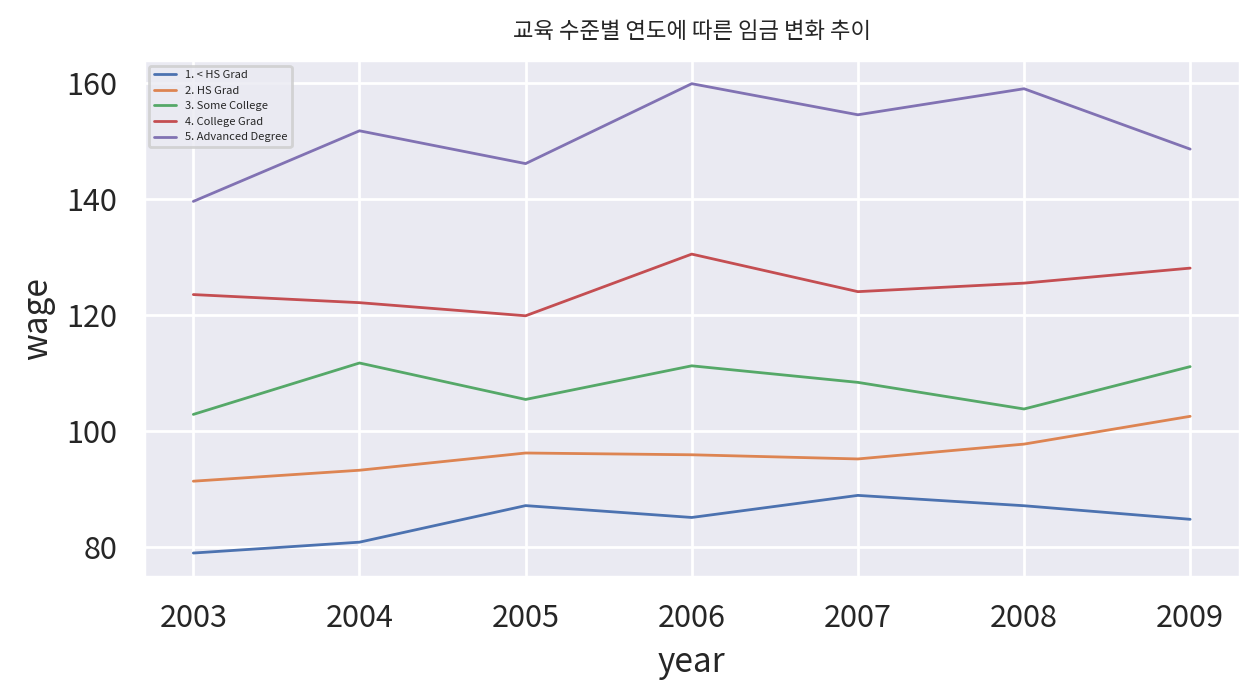

In [27]:
# 하나의 그래프에 교육 수준 별로 연도에 따른 임금의 변화 추이 시각화
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
for e in education:
    sb.lineplot(data=df1.query("education ==@e"), x="year", y="wage", label=e,linewidth=1,linestyle='-', errorbar=None)
# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)
ax.set_title("교육 수준별 연도에 따른 임금 변화 추이", fontsize=8, pad=8)
ax.legend(loc="upper left", fontsize=4)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료


1. 고학력 = 고임금
2. 고졸 미만의 경우 2007년도에 최고 임금을 찍고 내려가는 추세이다.
3. 고졸의 경우 시간이 갈 수록 임금이 올라가고 있다.
4. 대학 중퇴의 경우 2004년도에 최고임금을 찍고 2008년까지는 하락세를 보이고 있다가 2009년도부터 다시 올랐다.
5. 대학졸업의 경우 시간이 갈 수록 임금이 올라가고 있다.
6. 대학원 졸업의 경우 2006년도에 임금 최고점을 찍고 하락하는 추세이다.

 강사님 답안


In [28]:
origin = load_data("wage")
origin.head()

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [29]:
df1 = origin.astype({'year':'category', 'maritl':'category',
                     'race':'category', 'education':'category', 'region':'category',
                     'jobclass':'category', 'health':'category', 'health_ins':'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB


In [30]:
# 교육 수준 별 나이와 임금의 관계를 탐색
education = sorted(list(df1['education'].unique()))
education 

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

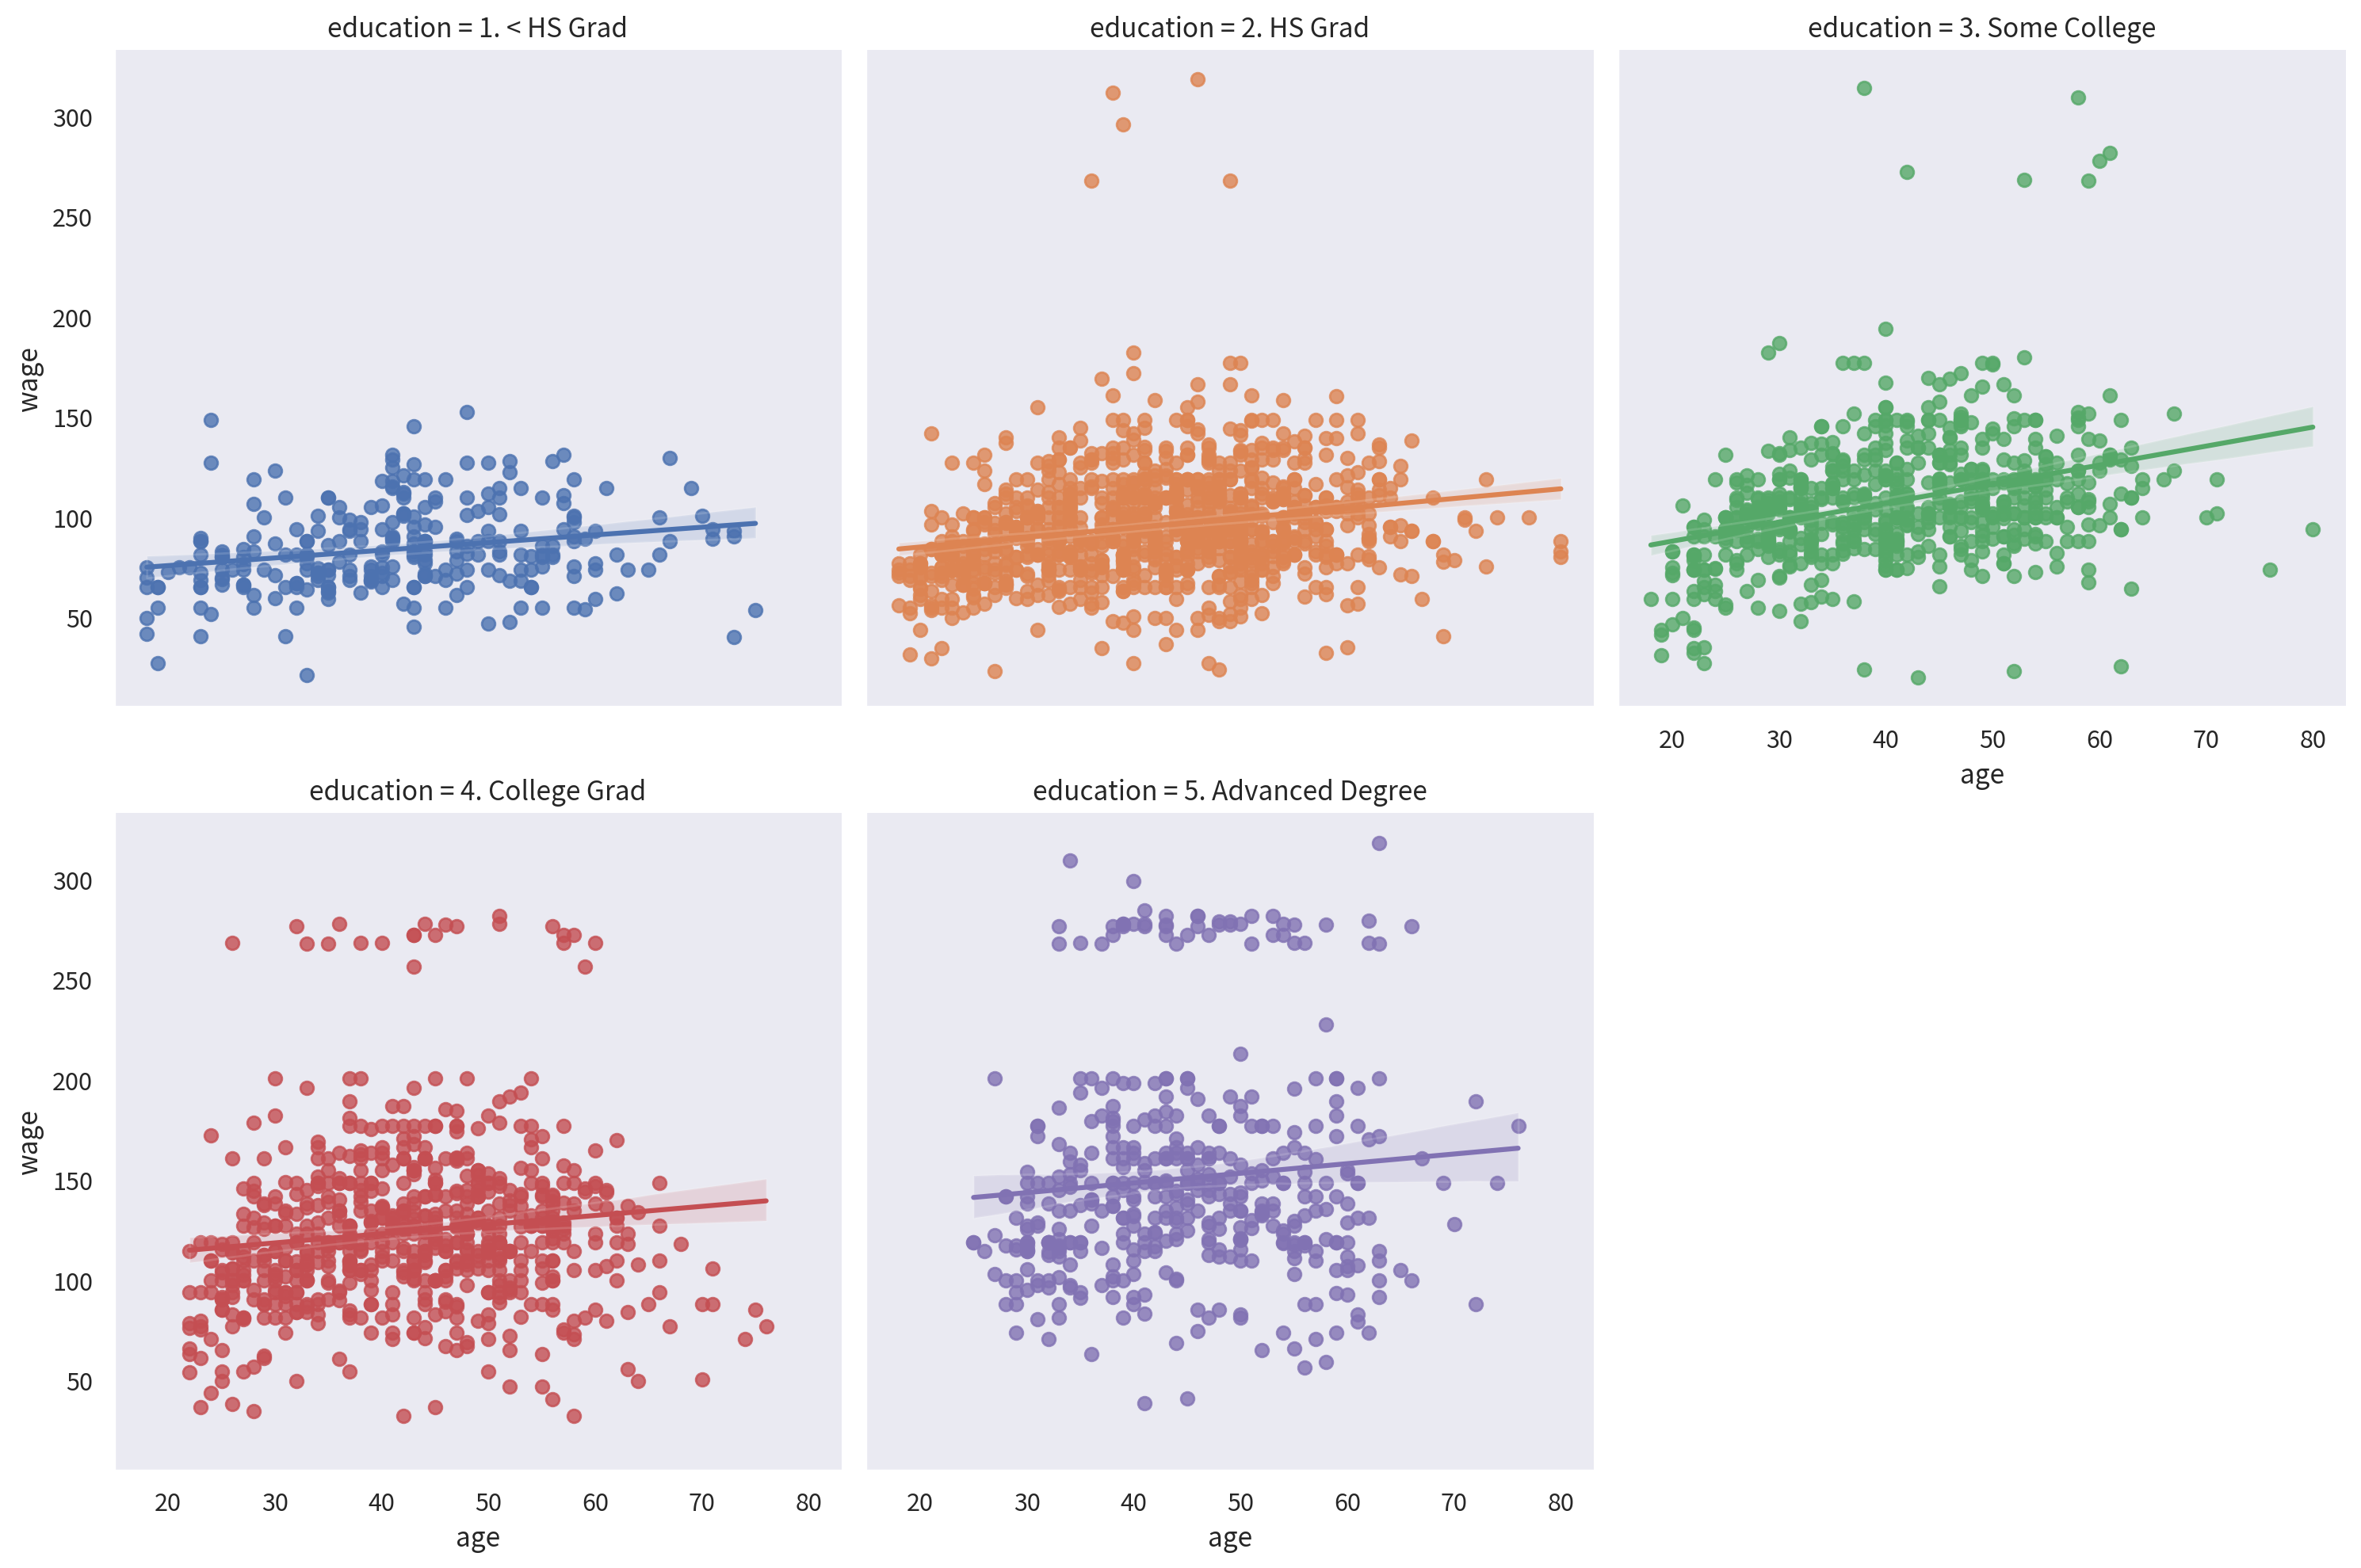

In [59]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 3000             #그래프 가로 크기
height_px =2000             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
g = sb.lmplot(data=df1, x="age", y="wage", hue="education",col = "education", col_wrap=3)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료)

- 전반적으로 나이가 많아질수록 임금이 상승하는 경향을 보인다.
- 교육 수준이 높을 수록 임금이 더 높은 경향을 보인다.

In [60]:
# 교육 수준 별 나이와 임금의 관계를 탐색
race = sorted(list(df1['race'].unique()))
race

['1. White', '2. Black', '3. Asian', '4. Other']

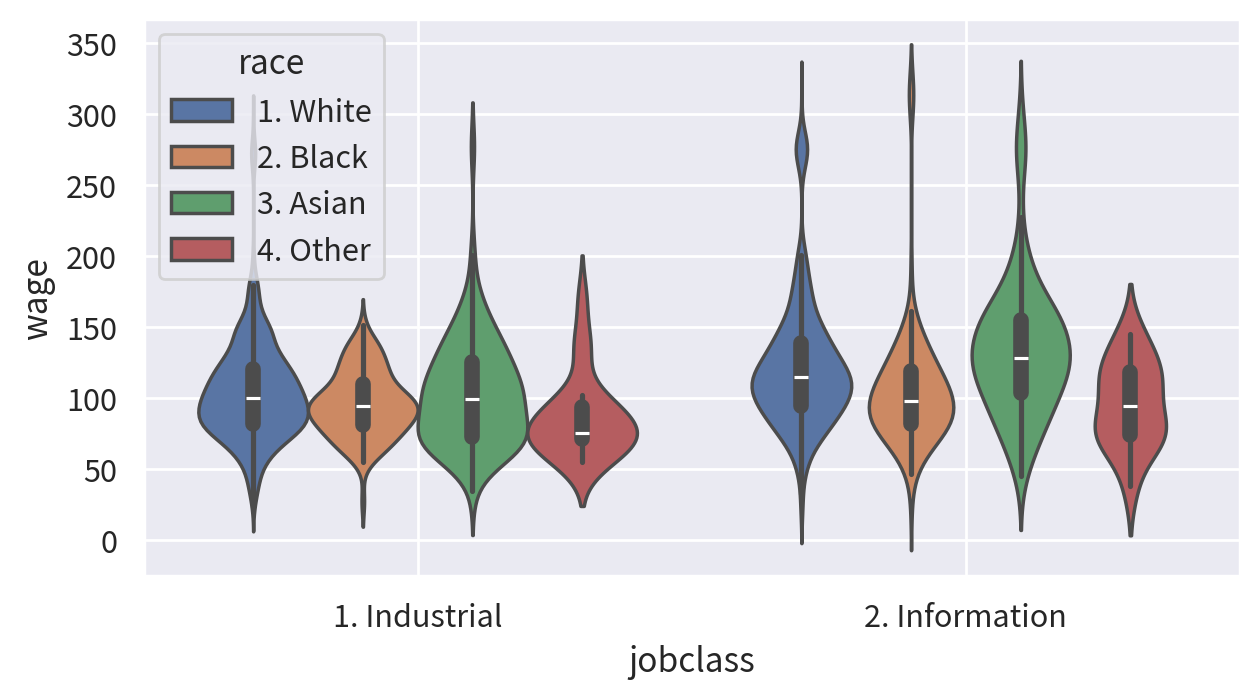

In [69]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280            #그래프 가로 크기
height_px =720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.violinplot(data=df1, x="jobclass", y="wage", hue="race")

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료)

- Information 직군이 Industrial 직군보다 전반적으로 임금 중앙값이 높게 나타난다.
- White와 Asian 인종은 두 직군 모두에서 Black이나 Other 인종보다 높은 임금 분포를 보인다.
- Asian 인종은 Information 직군에서 특히 높은 임금을 받는 비중이 다른 인종에 비해 두드러진다.
- Black 인종은 두 직군 모두에서 임금 분포가 비교적 낮은 쪽에 집중되어 있다.